<a href="https://colab.research.google.com/github/PuChan-HCI/myweb/blob/main/MediaSystem/ImageProcessing02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# URLから画像を入手 (Get an image from a url)
Note: In order to read an image from the github, you need to modify the url.

[Original URL] https://github.com/PuChan-HCI/myweb/blob/main/MediaSystem/woman.jpg (It's not working)

[Modified URL] https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/woman.jpg

In [1]:
import urllib.request
url = 'https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/woman.jpg'
file_name = 'woman.jpg'
urllib.request.urlretrieve(url, file_name)

('woman.jpg', <http.client.HTTPMessage at 0x7c6360141720>)

### 画像を表示 (Show the image)
*You need to covert the color order.*

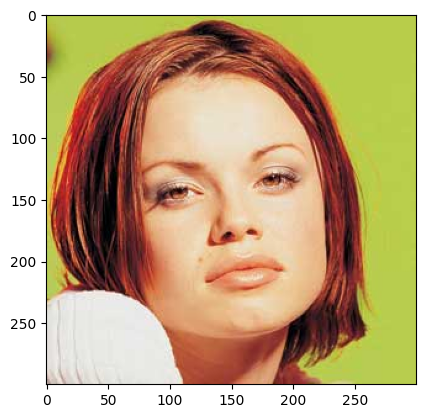

In [2]:
import cv2
from matplotlib import pyplot as plt

orig = cv2.imread('woman.jpg')
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src)

# 画像の畳み込み::平滑化 (Convolution::Smoothing)

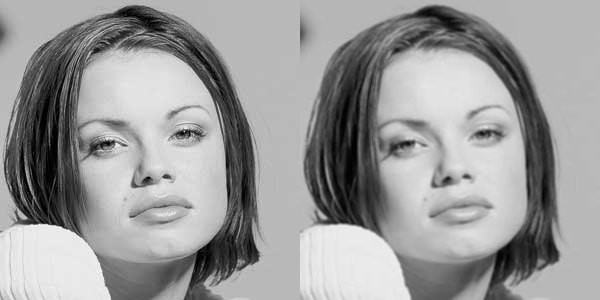

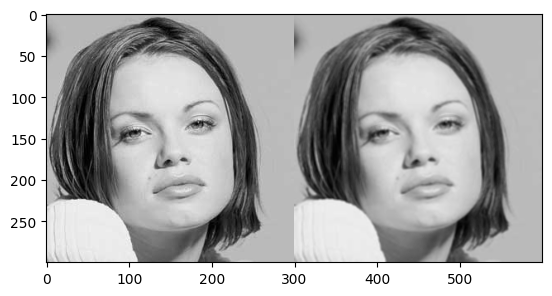

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

# Read an image
orig = cv2.imread('woman.jpg')

# Convert the image to a grayscale image
img = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

# Define your kernel
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

# Process and display
img_ave = cv2.filter2D(img, -1, kernel)
combined_image = cv2.hconcat([img,img_ave])
cv2_imshow(combined_image)

# Displaying with matplotlib (grayscale)
plt.imshow(combined_image, cmap="gray")

# 画像の畳み込み::様々なフィルタ (Convolution::Various Filters)

### 1次微分フィルタ

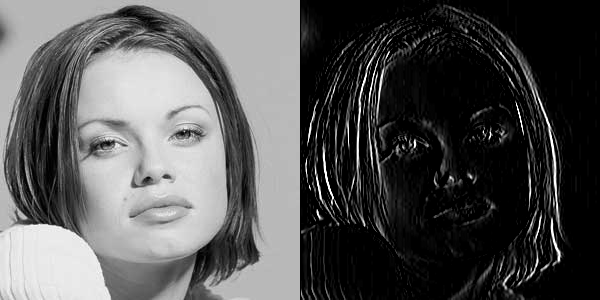

In [5]:
# Define the kernel
kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

# Process and display
img_filtered = cv2.filter2D(img, -1, kernel)
combined_image = cv2.hconcat([img,img_filtered])
cv2_imshow(combined_image)

### ラプラシアン (Laplacian Filter)

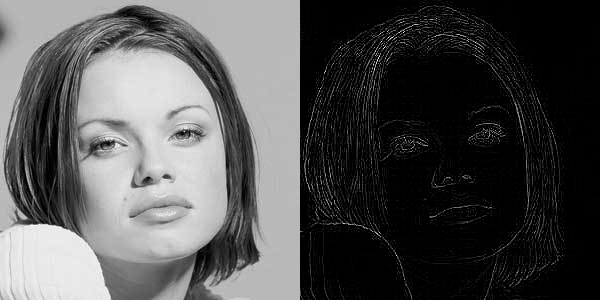

In [6]:
# Define the kernel
kernel = np.array([[0,  1, 0],
                   [1, -4, 1],
                   [0,  1, 0]])

# Process and display
img_filtered = cv2.filter2D(img, -1, kernel)
combined_image = cv2.hconcat([img,img_filtered])
cv2_imshow(combined_image)

### フィルタ関数::ガウシアン，メディアン，バイラテラル (Gaussian, Median, Bilateral)

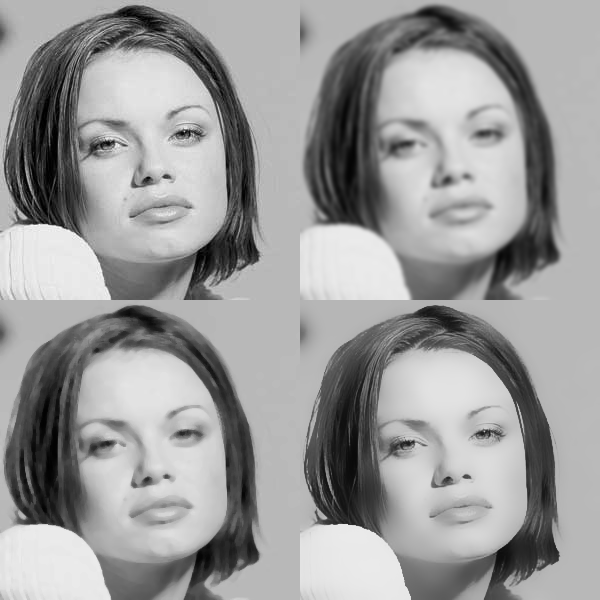

In [7]:
# ガウスフィルタ
img_ga = cv2.GaussianBlur(img, (9,9), 2)
# 中央値フィルタ
img_me = cv2.medianBlur(img,5)
# バイラテラルフィルタ
img_bi = cv2.bilateralFilter(img, 20, 30, 30)

combined_image_h1 = cv2.hconcat([img, img_ga])      # 二つの画像を横に並べる
combined_image_h2 = cv2.hconcat([img_me,img_bi])		# 二つの画像を横に並べる
combined_image = cv2.vconcat([combined_image_h1, combined_image_h2])	# 縦に並べる

cv2_imshow(combined_image)


# 画像二値化 (Binarization)

### 画素ごとに計算 (Binarization by thresholding each pixel)

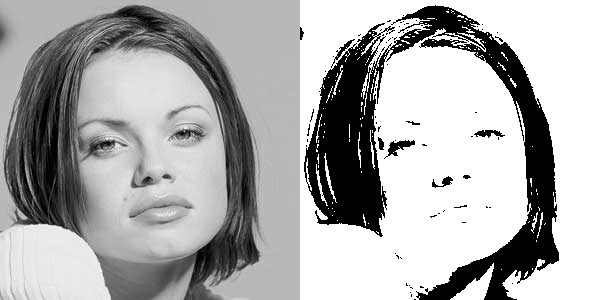

In [8]:
# 入力画像の高さと幅
h, w = img.shape[0], img.shape[1]
img_thresh = np.zeros((h,w))

# 閾値の設定
threshold = 100

# Process per pixel
for y in range(h):
  for x in range(w):
    if img[y][x] > threshold:
      img_thresh[y][x] = 255

# Process & display
img = img.astype('uint8')               # 型を合わせる
img_thresh = img_thresh.astype('uint8') # 型を合わせる
combined_image = cv2.hconcat([img,img_thresh])
cv2_imshow(combined_image)


### 内部関数で計算 (Binarization using the threshold function)

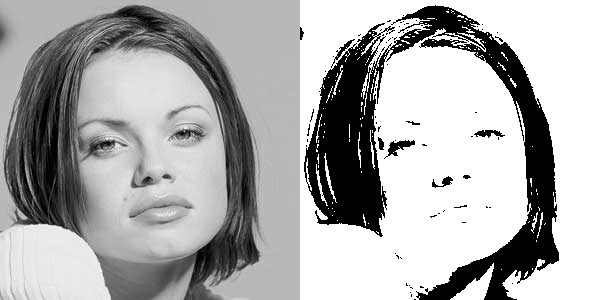

In [9]:
# 閾値の設定
threshold = 100

# 二値化(閾値100を超えた画素を255にする。)
ret, img_thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

# Process & display
combined_image = cv2.hconcat([img,img_thresh])
cv2_imshow(combined_image)

# 二値画像による擬似階調の表示 (Halftoning)

### ランダムディザ法 (random)

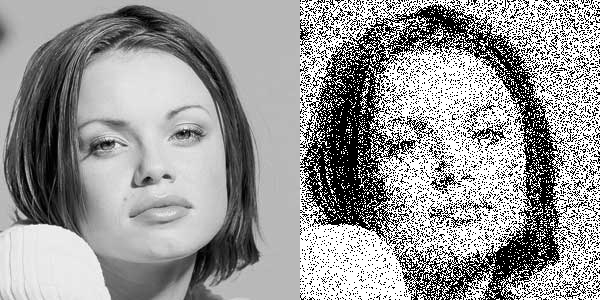

In [10]:
import random as rand

h, w = img.shape[0], img.shape[1]
gray_random = img.copy()

for i in range(h):
  for j in range(w):
    if gray_random[i][j] < rand.randint(0,255):
      gray_random[i][j] = 0
    else:
      gray_random[i][j] = 255

# Process & display
img = img.astype('uint8')               # 型を合わせる
gray_random = gray_random.astype('uint8') # 型を合わせる
combined_image = cv2.hconcat([img,gray_random])
cv2_imshow(combined_image)

### 組織シザリング (ordered dither)

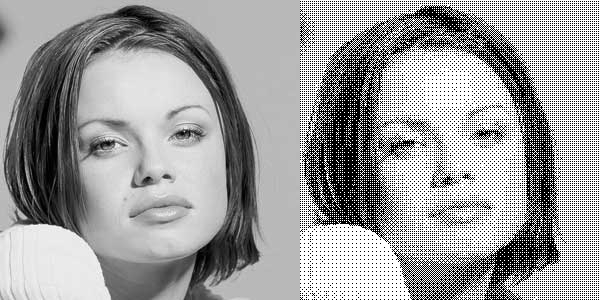

In [11]:
# 入力画像の高さと幅
h, w = img.shape[0], img.shape[1]
gray_ordered = img.copy()

# ディザリングマトリックス
matrix = [[0, 8, 2, 10],
          [12, 4, 14, 6],
          [3, 11, 1, 9],
          [15, 7, 13, 5]]

# 入力画像の階調に合わせる
for i in range(4):
  for j in range(4):
    matrix[i][j] = matrix[i][j] * 16

for i in range(h):
  for j in range(w):
    if gray_ordered[i][j] < matrix[i % 4][j % 4]:
      gray_ordered[i][j] = 0
    else:
      gray_ordered[i][j] = 255

# Process & display
img = img.astype('uint8')               # 型を合わせる
gray_ordered = gray_ordered.astype('uint8') # 型を合わせる
combined_image = cv2.hconcat([img,gray_ordered])
cv2_imshow(combined_image)


### 誤差拡散法 (error diffusion)

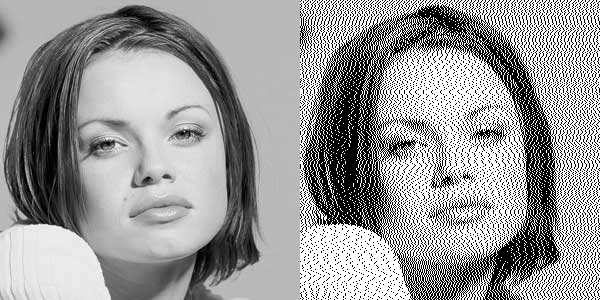

In [12]:
# 入力画像の高さと幅
h, w = img.shape[0], img.shape[1]
gray_diffusion = img.copy()

# 誤差
threshold = 128
difference = 0

for i in range(h):
  for j in range(w):
    if gray_diffusion[i][j] + difference < threshold:
      difference = gray_diffusion[i][j] + difference - 0    # 誤差を計算
      gray_diffusion[i][j] = 0
    else:
      difference = gray_diffusion[i][j] + difference - 255  # 誤差を計算
      gray_diffusion[i][j] = 255

# Process & display
img = img.astype('uint8')               # 型を合わせる
gray_diffusion= gray_diffusion.astype('uint8') # 型を合わせる
combined_image = cv2.hconcat([img,gray_diffusion])
cv2_imshow(combined_image)